In [1]:
import torch
import os
import nibabel as nib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

SRC_PATH = '/scratch/vb2183/hcp/data/metrics_postprocessed/'
SUBJ_PATH = os.path.join("/scratch/vb2183/hcp/","MRI_Lesion_Detection","subjects")
lis = os.listdir(SRC_PATH)
# print(np.array(nib.load(os.path.join(SRC_PATH, list[0],'fa.nii')).get_fdata()).shape)


In [17]:
# filename = os.path.join("/scratch/vb2183/hcp/","MRI_Lesion_Detection","subjects","trainList.txt")
# file = open(filename,"w")
# file.write(' '.join(list[:932]))
# file.close()

In [18]:
# filename = os.path.join("/scratch/vb2183/hcp/","MRI_Lesion_Detection","subjects","valList.txt")
# file = open(filename,"w")
# file.write(' '.join(list[932:982]))
# file.close()

In [19]:
# filename = os.path.join("/scratch/vb2183/hcp/","MRI_Lesion_Detection","subjects","testList.txt")
# file = open(filename,"w")
# file.write(' '.join(list[982:]))
# file.close()

In [2]:
with open(os.path.join(SUBJ_PATH,"trainList.txt")) as f:
        for line in f.readlines():
            trainSubjects = line.split(' ')
print("len(trainSubjects): ",len(trainSubjects))
with open(os.path.join(SUBJ_PATH,"valList.txt")) as f:
        for line in f.readlines():
            valSubjects = line.split(' ')
print("len(valSubjects): ",len(valSubjects))

len(trainSubjects):  932
len(valSubjects):  50


In [3]:
x = pd.read_csv('/scratch/vb2183/hcp/data/HCP_S1200_behavior.csv',index_col = 'Subject',usecols=['ProcSpeed_Unadj','Subject'])
# x.loc[100004,['ProcSpeed_Unadj']]
# x.at[100004,'ProcSpeed_Unadj']


932


(array([  2.,   1.,   6.,  52., 136., 269., 234., 122.,  60.,  50.]),
 array([ 51.62 ,  61.927,  72.234,  82.541,  92.848, 103.155, 113.462,
        123.769, 134.076, 144.383, 154.69 ]),
 <BarContainer object of 10 artists>)

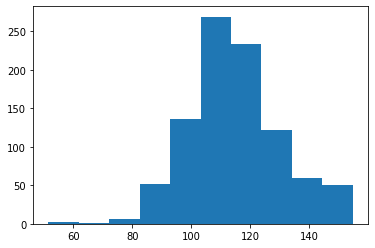

In [4]:
import matplotlib.pyplot as plt

labels=[]
for subj in trainSubjects:
    labels.append(x.at[int(subj[3:]),'ProcSpeed_Unadj'])
print(len(labels))
plt.figure()
plt.hist(labels)

1032


(array([  2.,   1.,   9.,  54., 148., 297., 258., 139.,  67.,  57.]),
 array([ 51.62 ,  61.927,  72.234,  82.541,  92.848, 103.155, 113.462,
        123.769, 134.076, 144.383, 154.69 ]),
 <BarContainer object of 10 artists>)

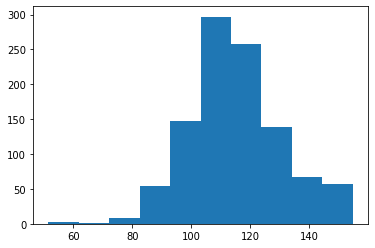

In [5]:
tot=[]
for subj in lis:
    tot.append(x.at[int(subj[3:]),'ProcSpeed_Unadj'])
print(len(tot))
plt.figure()
plt.hist(tot)
# train,test = train_test_split(np.arange(len(labels)),test_size=0.1,shuffle=True,stratify=labels)